In [79]:
import pandas as pd
%matplotlib inline
import re
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kevinlitnav/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/kevinlitnav/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [44]:
df = pd.read_csv('petfinderNY_database.csv')
df.head()

,additional_info,age,animal,breeds,description,id,lastUpdate,mixed,name,pet_size,...,sex,shelterID,zipcode,altered,vaccinated,housetrained,cynophobic,hates_children,felinephobic,specialNeeds
0,"['altered', 'hasShots', 'housetrained', 'noDog...",Adult,Cat,Tabby,Lincoln (#A1017544) was saved from the ACC's A...,30806905,2014-11-14T17:51:56Z,no,Lincoln,Medium,...,Male,NY374,10150,Altered,Vaccinated,Housetrained,Cynophobic,Definitely hates children,Not felinephobic,No special needs
1,"['altered', 'hasShots', 'housetrained']",Adult,Cat,Domestic Short Hair,ROOSIE (short for ROOSEVELT) is a nice easy-go...,32389630,2015-06-09T11:42:04Z,no,Roosie,Medium,...,Male,NY374,10150,Altered,Vaccinated,Housetrained,Not cynophobic,Does not hate children,Not felinephobic,No special needs
2,"['altered', 'hasShots', 'housetrained']",Young,Cat,Domestic Short Hair,Princess was a bottle baby rescued through ACC...,33623840,2015-10-26T21:06:00Z,no,Princess,Medium,...,Female,NY374,10150,Altered,Vaccinated,Housetrained,Not cynophobic,Does not hate children,Not felinephobic,No special needs
3,"['altered', 'hasShots', 'housetrained']",Young,Cat,Domestic Short Hair,"MURRY!! Oh, we love this adolescent. Murry ...",34111054,2015-12-27T21:56:31Z,no,Murry,Medium,...,Male,NY374,10150,Altered,Vaccinated,Housetrained,Not cynophobic,Does not hate children,Not felinephobic,No special needs
4,"['altered', 'hasShots', 'housetrained']",Young,Cat,Domestic Short Hair,ADRIAN and ARABELLA (now called ARIE) are brot...,39463373,2017-09-23T05:21:02Z,no,ADRIAN & Arabella,Medium,...,Male,NY374,10150,Altered,Vaccinated,Housetrained,Not cynophobic,Does not hate children,Not felinephobic,No special needs


In [45]:
df[df.animal == 'Cat'].description.str.contains('nice|pleasant|loving').value_counts()

False    169
True      37
Name: description, dtype: int64

In [46]:
df[df.animal == 'Dog'].description.str.contains('nice|pleasant|loving').value_counts()

False    182
True      88
Name: description, dtype: int64

In [47]:
df[df.felinephobic == 'Felinephobic'].breeds.value_counts()

Domestic Short Hair                                          10
Pit Bull Terrier                                              9
American Staffordshire Terrier                                3
Coonhound                                                     2
['Tabby', 'Domestic Short Hair']                              2
Tabby                                                         2
['Labrador Retriever', 'Border Collie']                       1
American Shorthair                                            1
Domestic Medium Hair                                          1
['Hound', 'Pit Bull Terrier']                                 1
['Pit Bull Terrier', 'Boxer']                                 1
Tuxedo                                                        1
['Calico', 'Domestic Short Hair']                             1
['Beagle', 'Mastiff']                                         1
['American Staffordshire Terrier', 'Pit Bull Terrier']        1
German Shepherd Dog                     

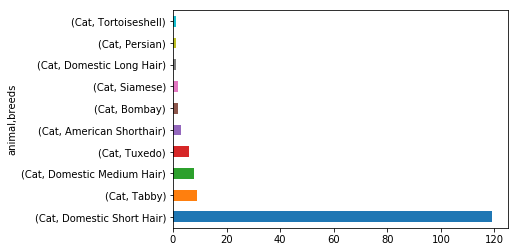

In [48]:
df[df.mixed == 'no'].groupby('animal').breeds.value_counts().head(10).plot(kind='barh', stacked=True)

In [ ]:
descriptions_as_string_list = df.description.get_values().tolist()
descriptions_as_string = ''.join(descriptions_as_string_list)

tokenized_descriptions = nltk.word_tokenize(descriptions_as_string)
tagged_words = nltk.pos_tag(tokenized_descriptions)

all_adjectives = []

for tagged_word in tagged_words:
    if tagged_word[1] == 'JJ':
        all_adjectives.append(tagged_word[0])
    elif tagged_word[1] == 'JJS':
        all_adjectives.append(tagged_word[0])
    elif tagged_word[1] == 'JJR':
        all_adjectives.append(tagged_word[0])
        
counted_adjectives = Counter(all_adjectives)

list_counted_adjectives = []

for counted_adjective in counted_adjectives:
    list_counted_adjectives.append(counted_adjective)

adjective_df = pd.DataFrame(list_counted_adjectives)

In [49]:
descriptions_as_string_list = df.description.get_values().tolist()

In [61]:
descriptions_as_string = ''.join(descriptions_as_string_list)

In [56]:
test_text = nltk.word_tokenize('here is a sentence with great adjectives and strangely constructed verb tenses')
nltk.pos_tag(test_text)

[('here', 'RB'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('sentence', 'NN'),
 ('with', 'IN'),
 ('great', 'JJ'),
 ('adjectives', 'NNS'),
 ('and', 'CC'),
 ('strangely', 'RB'),
 ('constructed', 'VBD'),
 ('verb', 'NN'),
 ('tenses', 'NNS')]

In [63]:
tokenized_descriptions = nltk.word_tokenize(descriptions_as_string)
tagged_words = nltk.pos_tag(tokenized_descriptions)

In [69]:
tagged_words[0][1]

'NNP'

In [76]:
all_adjectives = []

for tagged_word in tagged_words:
    if tagged_word[1] == 'JJ':
        all_adjectives.append(tagged_word[0])
    elif tagged_word[1] == 'JJS':
        all_adjectives.append(tagged_word[0])
    elif tagged_word[1] == 'JJR':
        all_adjectives.append(tagged_word[0])

In [84]:
counted_adjectives = Counter(all_adjectives)

list_counted_adjectives = []

for counted_adjective in counted_adjectives:
    list_counted_adjectives.append(counted_adjective)

adjective_df = pd.DataFrame(list_counted_adjectives)

In [138]:
all_adjectives

adjective_df = pd.DataFrame(all_adjectives)
adjective_df.head()

,0
0,shy
1,old
2,dear
3,heart-wrenching
4,little


In [183]:
adjective_df = adjective_df[adjective_df[0] != 'other']
adjective_df = adjective_df[adjective_df[0] != 'foster']
adjective_df = adjective_df[adjective_df[0] != 'more']
adjective_df = adjective_df[adjective_df[0] != 'new']
adjective_df = adjective_df[adjective_df[0] != 'interested']
adjective_df = adjective_df[adjective_df[0] != 'negative']
adjective_df = adjective_df[adjective_df[0] != 'old']
adjective_df[0].value_counts().head(10)

sweet       178
great       147
little      143
good        139
friendly     86
happy        85
best         76
playful      76
small        72
perfect      70
Name: 0, dtype: int64

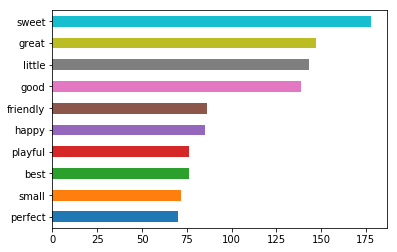

In [202]:
adjective_df[0].value_counts().head(10).sort_values(ascending=True).plot(kind='barh')

# Dogs!

In [154]:
descriptions_as_string_list = df[df.animal == 'Dog'].description.get_values().tolist()
descriptions_as_string = ''.join(descriptions_as_string_list)

tokenized_descriptions = nltk.word_tokenize(descriptions_as_string)
tagged_words = nltk.pos_tag(tokenized_descriptions)

all_adjectives = []

for tagged_word in tagged_words:
    if tagged_word[1] == 'JJ':
        all_adjectives.append(tagged_word[0])
    elif tagged_word[1] == 'JJS':
        all_adjectives.append(tagged_word[0])
    elif tagged_word[1] == 'JJR':
        all_adjectives.append(tagged_word[0])

dog_adjective_df = pd.DataFrame(all_adjectives)
dog_adjective_df.head()
dog_adjective_df[0].value_counts().head(10)

old           183
other         154
great         122
foster        117
good          109
sweet         102
little         90
new            73
interested     72
more           72
Name: 0, dtype: int64

### Removing words that don't describe personality

In [195]:
dog_adjective_df = dog_adjective_df[dog_adjective_df[0] != 'other']
dog_adjective_df = dog_adjective_df[dog_adjective_df[0] != 'foster']
dog_adjective_df = dog_adjective_df[dog_adjective_df[0] != 'more']
dog_adjective_df = dog_adjective_df[dog_adjective_df[0] != 'new']
dog_adjective_df = dog_adjective_df[dog_adjective_df[0] != 'interested']
dog_adjective_df = dog_adjective_df[dog_adjective_df[0] != 'old']
dog_adjective_df = dog_adjective_df[dog_adjective_df[0] != 'few']
dog_adjective_df = dog_adjective_df[dog_adjective_df[0] != 'final']
dog_adjective_df = dog_adjective_df[dog_adjective_df[0] != 'available']
dog_adjective_df = dog_adjective_df[dog_adjective_df[0] != 'little']
dog_adjective_df = dog_adjective_df[dog_adjective_df[0] != 'small']
dog_adjective_df = dog_adjective_df[dog_adjective_df[0] != 'complete']
dog_adjective_df[0].value_counts().head(10)

great       122
good        109
sweet       102
happy        58
best         54
perfect      53
active       52
friendly     41
playful      40
gentle       39
Name: 0, dtype: int64

# Cats!

In [181]:
descriptions_as_string_list = df[df.animal == 'Cat'].description.get_values().tolist()
descriptions_as_string = ''.join(descriptions_as_string_list)

tokenized_descriptions = nltk.word_tokenize(descriptions_as_string)
tagged_words = nltk.pos_tag(tokenized_descriptions)

all_adjectives = []

for tagged_word in tagged_words:
    if tagged_word[1] == 'JJ':
        all_adjectives.append(tagged_word[0])
    elif tagged_word[1] == 'JJS':
        all_adjectives.append(tagged_word[0])
    elif tagged_word[1] == 'JJR':
        all_adjectives.append(tagged_word[0])
        
cat_adjective_df = pd.DataFrame(all_adjectives)
cat_adjective_df.head()
cat_adjective_df[0].value_counts().head(10)

old         107
other        85
sweet        76
more         58
negative     57
little       53
foster       48
friendly     45
new          43
playful      36
Name: 0, dtype: int64

### Removing words that don't describe personality

In [193]:
cat_adjective_df = cat_adjective_df[cat_adjective_df[0] != 'other']
cat_adjective_df = cat_adjective_df[cat_adjective_df[0] != 'foster']
cat_adjective_df = cat_adjective_df[cat_adjective_df[0] != 'more']
cat_adjective_df = cat_adjective_df[cat_adjective_df[0] != 'new']
cat_adjective_df = cat_adjective_df[cat_adjective_df[0] != 'negative']
cat_adjective_df = cat_adjective_df[cat_adjective_df[0] != 'old']
cat_adjective_df = cat_adjective_df[cat_adjective_df[0] != 'young']
cat_adjective_df = cat_adjective_df[cat_adjective_df[0] != 'little']
cat_adjective_df = cat_adjective_df[cat_adjective_df[0] != 'first']
cat_adjective_df[0].value_counts().head(10)

sweet           76
friendly        45
playful         36
beautiful       33
shy             31
gentle          30
good            30
affectionate    28
happy           27
great           25
Name: 0, dtype: int64

In [179]:
df[df.description.str.contains('old')].description[59]

"Pecan - 1 yr old petite female with some big opinions:\n\nI'm a little girl, sweet as a southern pie, most of the time. I am bouncy and spry, and I love to chase the laser light and dangly toys. I like some petting, a quick massage, but I'm not into a lot of snuggling, and I might swat you away when your time is up. You should know that  I can really get nutty around other cats. I've been around other cats and can definitely say that it's not for me!  But if it's just you and me and you're in to chilling out together after some active playtime, then we will be great companions. For more information about Pecan, please email us at adoptions@citycritters.org."

## Other stuff

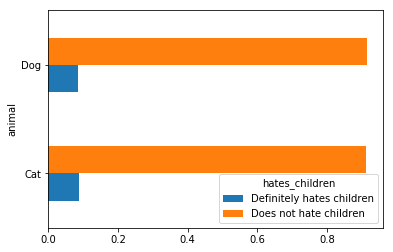

In [268]:
df.groupby('animal').hates_children.value_counts(normalize=True).unstack().plot(kind='barh')

In [279]:
cat_adjective_df = cat_adjective_df[0].value_counts().reset_index()
cat_adjective_df

,index,0
0,sweet,76
1,friendly,45
2,playful,36
3,beautiful,33
4,shy,31
5,gentle,30
6,good,30
7,affectionate,28
8,happy,27
9,great,25


In [280]:
dog_adjective_df = dog_adjective_df[0].value_counts().reset_index()
dog_adjective_df

,index,0
0,great,122
1,good,109
2,sweet,102
3,happy,58
4,best,54
5,perfect,53
6,active,52
7,friendly,41
8,playful,40
9,gentle,39


In [281]:
word_frequency_df = pd.merge(dog_adjective_df, cat_adjective_df, on='index')

In [290]:
word_frequency_df.rename(columns={'0_x': "Dog", '0_y': "Cat"}, inplace=True)

In [297]:
word_frequency_df['sum'] = word_frequency_df.Dog + word_frequency_df.Cat
word_frequency_df.head()
word_frequency_df.sort_values(by='sum', ascending=False).head(10)

,index,Dog,Cat,sum
2,sweet,102,76,178
0,great,122,25,147
1,good,109,30,139
7,friendly,41,45,86
3,happy,58,27,85
4,best,54,22,76
8,playful,40,36,76
5,perfect,53,17,70
9,gentle,39,30,69
6,active,52,11,63


In [301]:
word_frequency_df =  word_frequency_df.set_index('index')

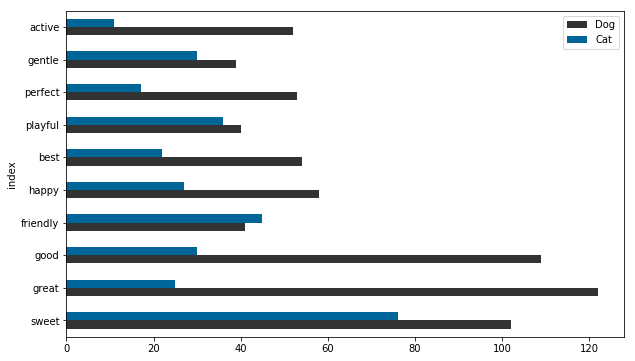

In [308]:
ax = word_frequency_df.sort_values(by='sum', ascending=False).head(10).plot(kind='barh', y=['Dog', 'Cat'], color = ['#333333', '#006699', 'mediumaquamarine'], figsize=(10,6))

